In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_column',None)

In [3]:
trader=pd.read_csv('historical_data.csv')
market=pd.read_csv('fear_greed_index.csv')

In [4]:
trader

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [5]:
trader.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
trader.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [7]:
trader.shape

(211224, 16)

In [8]:
trader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [9]:
trader.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [10]:
trader.duplicated().sum().item()

0

In [11]:
# Convert to datetime (auto detects yyyy-mm-dd HH:MM format)
trader['Timestamp IST'] = pd.to_datetime(trader['Timestamp IST'], format='%d-%m-%Y %H:%M')


In [12]:
# Extract date
trader['Date'] = trader['Timestamp IST'].dt.date

In [13]:
trader

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25


In [14]:
trader['Coin'].value_counts()

Coin
HYPE    68005
@107    29992
BTC     26064
ETH     11158
SOL     10691
        ...  
@18         1
@30         1
@25         1
@86         1
@68         1
Name: count, Length: 246, dtype: int64

In [15]:
market

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [16]:
print(trader['Date'].dtype)
print(market['date'].dtype)

object
object


In [17]:
# Convert to datetime and extract only date (without time part)
trader['Date'] = pd.to_datetime(trader['Date']).dt.date
market['date'] = pd.to_datetime(market['date']).dt.date

In [18]:
print(type(trader['Date'].iloc[0]))
print(type(market['date'].iloc[0]))

<class 'datetime.date'>
<class 'datetime.date'>


In [19]:
merged_df = pd.merge(trader, market, left_on='Date', right_on='date', how='inner')

In [20]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,1745559000,60,Greed,2025-04-25
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,1745559000,60,Greed,2025-04-25
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,1745559000,60,Greed,2025-04-25
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,1745559000,60,Greed,2025-04-25


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211218 non-null  object        
 1   Coin              211218 non-null  object        
 2   Execution Price   211218 non-null  float64       
 3   Size Tokens       211218 non-null  float64       
 4   Size USD          211218 non-null  float64       
 5   Side              211218 non-null  object        
 6   Timestamp IST     211218 non-null  datetime64[ns]
 7   Start Position    211218 non-null  float64       
 8   Direction         211218 non-null  object        
 9   Closed PnL        211218 non-null  float64       
 10  Transaction Hash  211218 non-null  object        
 11  Order ID          211218 non-null  int64         
 12  Crossed           211218 non-null  bool          
 13  Fee               211218 non-null  float64       
 14  Trad

In [22]:
merged_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
timestamp           0
value               0
classification      0
date                0
dtype: int64

In [23]:
#drop the column
merged_df.drop(columns=['Timestamp IST','Timestamp','Date','timestamp','Transaction Hash','Order ID','Trade ID','Account'],inplace=True)

In [24]:
merged_df.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,value,classification,date
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,80,Extreme Greed,2024-12-02
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,80,Extreme Greed,2024-12-02
2,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,80,Extreme Greed,2024-12-02
3,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,80,Extreme Greed,2024-12-02
4,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,80,Extreme Greed,2024-12-02


In [25]:
merged_df['classification'].value_counts()

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [26]:
#create a column Normalized PnL
merged_df['Normalized PnL']=merged_df['Closed PnL'] / merged_df['Size USD']

In [27]:
#create a column trade ROI %
merged_df['Trade ROI(%)']=(merged_df['Closed PnL'] / merged_df['Size USD']) * 100

In [28]:
#create a column Fee%
merged_df['Fee%']= (merged_df['Fee'] / merged_df['Size USD'])*100

In [29]:
#Net PnL (After Fee)
merged_df['Net PnL']=merged_df['Closed PnL'] - merged_df['Fee']

In [30]:
merged_df['Profitable'] = np.where(merged_df['Closed PnL'] > 0, 'Profitable', 'Loss')

In [31]:
merged_df

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,value,classification,date,Normalized PnL,Trade ROI(%),Fee%,Net PnL,Profitable
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0000,True,0.345404,80,Extreme Greed,2024-12-02,0.000000,0.000000,0.004388,-0.345404,Loss
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0000,True,0.005600,80,Extreme Greed,2024-12-02,0.000000,0.000000,0.004386,-0.005600,Loss
2,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0000,True,0.050431,80,Extreme Greed,2024-12-02,0.000000,0.000000,0.004383,-0.050431,Loss
3,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0000,True,0.050043,80,Extreme Greed,2024-12-02,0.000000,0.000000,0.004382,-0.050043,Loss
4,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0000,True,0.003055,80,Extreme Greed,2024-12-02,0.000000,0.000000,0.004381,-0.003055,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211213,FARTCOIN,1.1010,382.20,420.80,SELL,7546.600000,Close Long,-20.2566,False,0.042080,60,Greed,2025-04-25,-0.048138,-4.813831,0.010000,-20.298680,Loss
211214,FARTCOIN,1.1010,2124.10,2338.63,SELL,7164.400000,Close Long,-112.5773,False,0.233863,60,Greed,2025-04-25,-0.048138,-4.813814,0.010000,-112.811163,Loss
211215,FARTCOIN,1.1010,423.40,466.16,SELL,5040.300000,Close Long,-22.4402,False,0.046616,60,Greed,2025-04-25,-0.048138,-4.813841,0.010000,-22.486816,Loss
211216,FARTCOIN,1.1010,3599.80,3963.38,SELL,4616.900000,Close Long,-190.7894,False,0.396337,60,Greed,2025-04-25,-0.048138,-4.813805,0.010000,-191.185737,Loss


In [32]:
#Win Rate by Sentiment
profit_counts = merged_df.groupby('classification')['Profitable'].value_counts().unstack(fill_value=0).reset_index()

In [33]:
profit_counts

Profitable,classification,Loss,Profitable
0,Extreme Fear,13469,7931
1,Extreme Greed,21398,18594
2,Fear,35818,26019
3,Greed,30945,19358
4,Neutral,22725,14961


In [34]:
avg_stats = (
    merged_df.groupby('classification')[['Closed PnL', 'Normalized PnL', 'Size USD', 'value', 'Fee']]
    .mean()
    .reset_index()
    .rename(columns={
        'classification': 'Sentiment',
        'Closed PnL': 'Avg PnL',
        'Normalized PnL': 'Avg Normalized PnL',
        'Size USD': 'Avg Trade Size USD',
        'value': 'Avg Sentiment Score',
        'Fee': 'Avg Fee'
    })
)

In [35]:
avg_stats

,Sentiment,Avg PnL,Avg Normalized PnL,Avg Trade Size USD,Avg Sentiment Score,Avg Fee
0,Extreme Fear,34.537862,0.004321,5349.731843,19.690514,1.116291
1,Extreme Greed,67.892861,0.040027,3112.251565,79.552986,0.675902
2,Fear,54.290400,0.015412,7816.109931,33.202549,1.495172
3,Greed,42.743559,0.019653,5736.884375,67.977775,1.254372
4,Neutral,34.307718,0.009936,4782.732661,48.661174,1.044798


Univariate Analysis

<Axes: xlabel='classification', ylabel='count'>

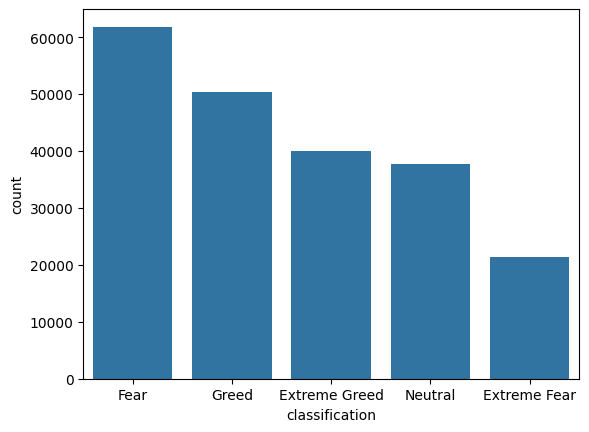

In [36]:
sns.barplot(merged_df['classification'].value_counts())

In [37]:
df_numeric=merged_df[['Execution Price','Size Tokens','Size USD','Start Position','Closed PnL']]

In [38]:
df_numeric.corr()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL
Execution Price,1.000000,-0.017185,0.189859,0.017242,-0.006429
Size Tokens,-0.017185,1.000000,0.013310,0.044660,0.005067
Size USD,0.189859,0.013310,1.000000,0.007787,0.123645
Start Position,0.017242,0.044660,0.007787,1.000000,0.004068
Closed PnL,-0.006429,0.005067,0.123645,0.004068,1.000000


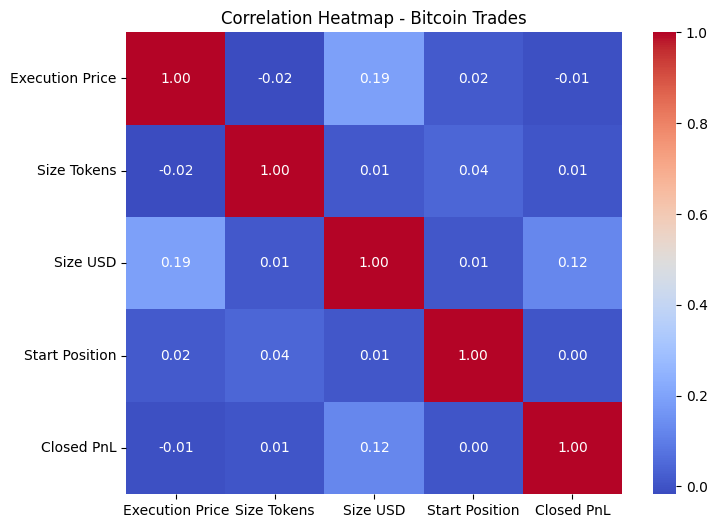

In [39]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Bitcoin Trades")
plt.show()

In [40]:
merged_df[['Closed PnL','classification']]

,Closed PnL,classification
0,0.0000,Extreme Greed
1,0.0000,Extreme Greed
2,0.0000,Extreme Greed
3,0.0000,Extreme Greed
4,0.0000,Extreme Greed
...,...,...
211213,-20.2566,Greed
211214,-112.5773,Greed
211215,-22.4402,Greed
211216,-190.7894,Greed


<Axes: xlabel='classification', ylabel='Closed PnL'>

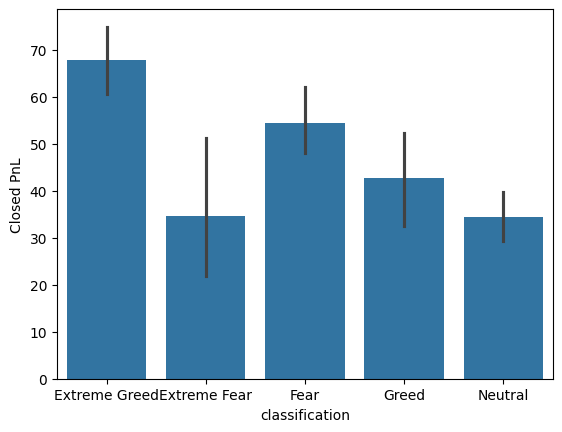

In [41]:
#Bar plot on classification and Closed Pnl
sns.barplot(x=merged_df['classification'],y=merged_df['Closed PnL'])

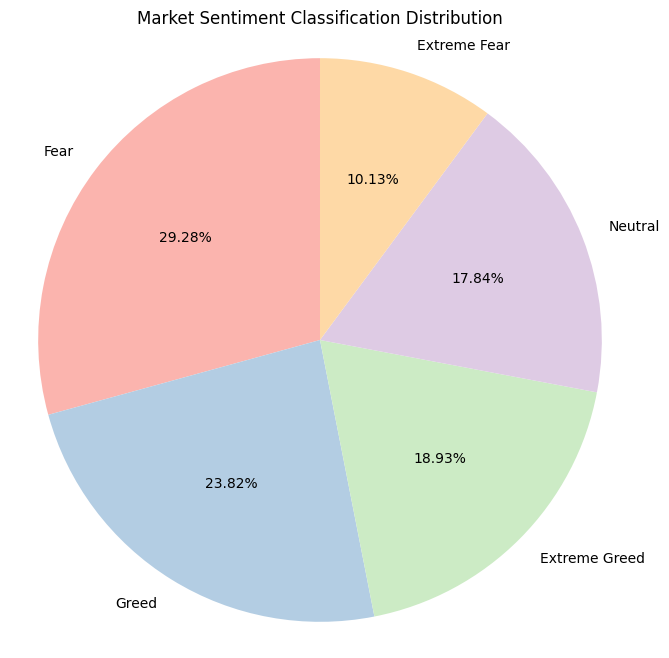

In [42]:
# Count the values per classification category
classification_counts = merged_df['classification'].value_counts()

# Plot pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=classification_counts.index, autopct='%0.2f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Market Sentiment Classification Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [43]:
merged_df.to_csv('merged_df1.csv',index=True)

C:\Users\Navneet\AppData\Local\Temp\ipykernel_5944\4230390477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='Normalized PnL', estimator=np.mean, palette='viridis')


<Axes: xlabel='classification', ylabel='Normalized PnL'>

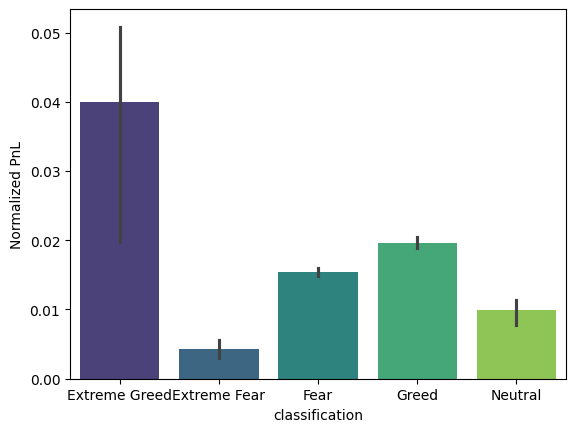

In [44]:
# Average Normalized PnL by Sentiment
sns.barplot(data=merged_df, x='classification', y='Normalized PnL', estimator=np.mean, palette='viridis')

C:\Users\Navneet\AppData\Local\Temp\ipykernel_5944\1556839595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df,x='classification',y='Closed PnL',estimator=np.mean,palette='viridis')


<Axes: xlabel='classification', ylabel='Closed PnL'>

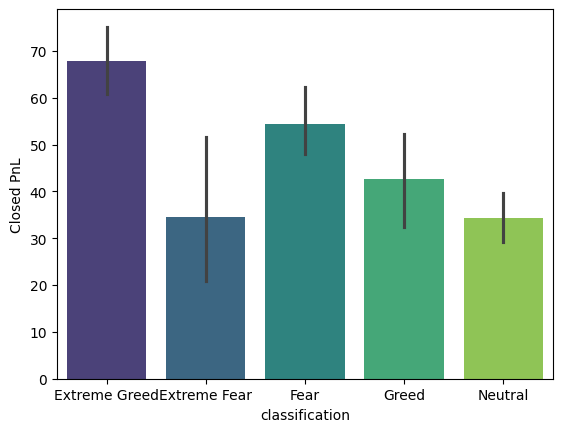

In [45]:
# Avg PnL by sentiment
sns.barplot(data=merged_df,x='classification',y='Closed PnL',estimator=np.mean,palette='viridis')

C:\Users\Navneet\AppData\Local\Temp\ipykernel_5944\582981012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df,x='classification',y='Trade ROI(%)',estimator=np.mean,palette='viridis')


<Axes: xlabel='classification', ylabel='Trade ROI(%)'>

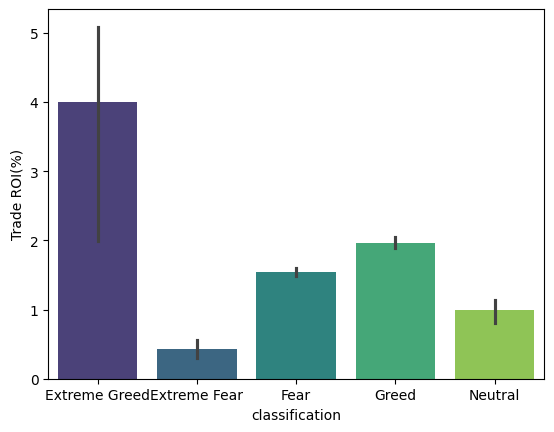

In [46]:
#Average Trade ROI% by sentiment
sns.barplot(data=merged_df,x='classification',y='Trade ROI(%)',estimator=np.mean,palette='viridis')

In [47]:
profit_counts

Profitable,classification,Loss,Profitable
0,Extreme Fear,13469,7931
1,Extreme Greed,21398,18594
2,Fear,35818,26019
3,Greed,30945,19358
4,Neutral,22725,14961


<Axes: xlabel='Profitable', ylabel='Loss'>

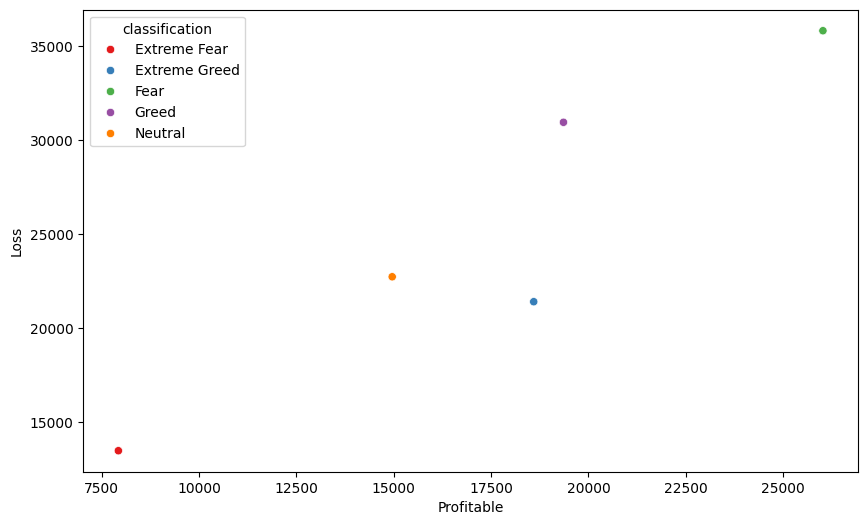

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=profit_counts, x='Profitable', y='Loss', hue='classification', palette='Set1')

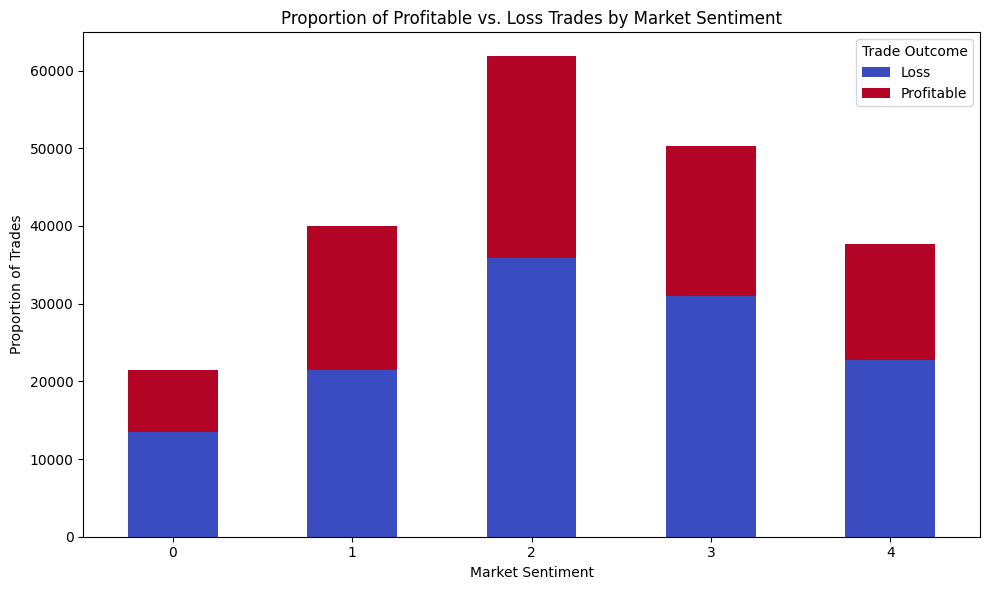

In [49]:
# Plot stacked bar chart
ax = profit_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='coolwarm'
)
plt.title('Proportion of Profitable vs. Loss Trades by Market Sentiment')
plt.ylabel('Proportion of Trades')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=0)
plt.legend(title='Trade Outcome', labels=['Loss', 'Profitable'])
plt.tight_layout()
plt.show()

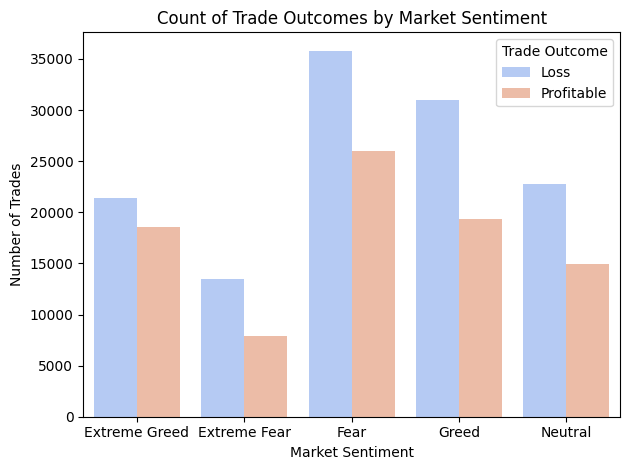

In [50]:
# 2. Grouped count bar chart
sns.countplot(data=merged_df, x='classification', hue='Profitable', palette='coolwarm')
plt.title('Count of Trade Outcomes by Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.legend(title='Trade Outcome')

plt.tight_layout()
plt.show()

In [51]:
merged_df

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,value,classification,date,Normalized PnL,Trade ROI(%),Fee%,Net PnL,Profitable
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0000,True,0.345404,80,Extreme Greed,2024-12-02,0.000000,0.000000,0.004388,-0.345404,Loss
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0000,True,0.005600,80,Extreme Greed,2024-12-02,0.000000,0.000000,0.004386,-0.005600,Loss
2,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0000,True,0.050431,80,Extreme Greed,2024-12-02,0.000000,0.000000,0.004383,-0.050431,Loss
3,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0000,True,0.050043,80,Extreme Greed,2024-12-02,0.000000,0.000000,0.004382,-0.050043,Loss
4,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0000,True,0.003055,80,Extreme Greed,2024-12-02,0.000000,0.000000,0.004381,-0.003055,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211213,FARTCOIN,1.1010,382.20,420.80,SELL,7546.600000,Close Long,-20.2566,False,0.042080,60,Greed,2025-04-25,-0.048138,-4.813831,0.010000,-20.298680,Loss
211214,FARTCOIN,1.1010,2124.10,2338.63,SELL,7164.400000,Close Long,-112.5773,False,0.233863,60,Greed,2025-04-25,-0.048138,-4.813814,0.010000,-112.811163,Loss
211215,FARTCOIN,1.1010,423.40,466.16,SELL,5040.300000,Close Long,-22.4402,False,0.046616,60,Greed,2025-04-25,-0.048138,-4.813841,0.010000,-22.486816,Loss
211216,FARTCOIN,1.1010,3599.80,3963.38,SELL,4616.900000,Close Long,-190.7894,False,0.396337,60,Greed,2025-04-25,-0.048138,-4.813805,0.010000,-191.185737,Loss


In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Coin             211218 non-null  object 
 1   Execution Price  211218 non-null  float64
 2   Size Tokens      211218 non-null  float64
 3   Size USD         211218 non-null  float64
 4   Side             211218 non-null  object 
 5   Start Position   211218 non-null  float64
 6   Direction        211218 non-null  object 
 7   Closed PnL       211218 non-null  float64
 8   Crossed          211218 non-null  bool   
 9   Fee              211218 non-null  float64
 10  value            211218 non-null  int64  
 11  classification   211218 non-null  object 
 12  date             211218 non-null  object 
 13  Normalized PnL   211175 non-null  float64
 14  Trade ROI(%)     211175 non-null  float64
 15  Fee%             211175 non-null  float64
 16  Net PnL          211218 non-null  floa

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [59]:
#Select numeric features
features = [
    'Execution Price',
    'Size USD',
    'Closed PnL',
    'Normalized PnL',
    'Trade ROI(%)',
    'Fee%',
    'Net PnL'
]

In [60]:
clustering_data=merged_df[features].dropna()

In [61]:
scaler=StandardScaler()

In [62]:
scaled_data=scaler.fit_transform(clustering_data)

In [63]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

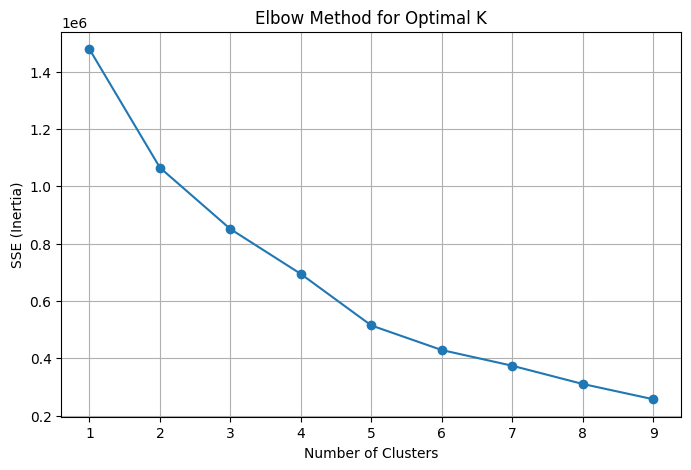

In [64]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()

In [65]:
#Fit KMeans using the selected number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [66]:
#Store cluster labels in your DataFrame
merged_df = merged_df.copy()
merged_df.loc[clustering_data.index, 'Cluster'] = clusters

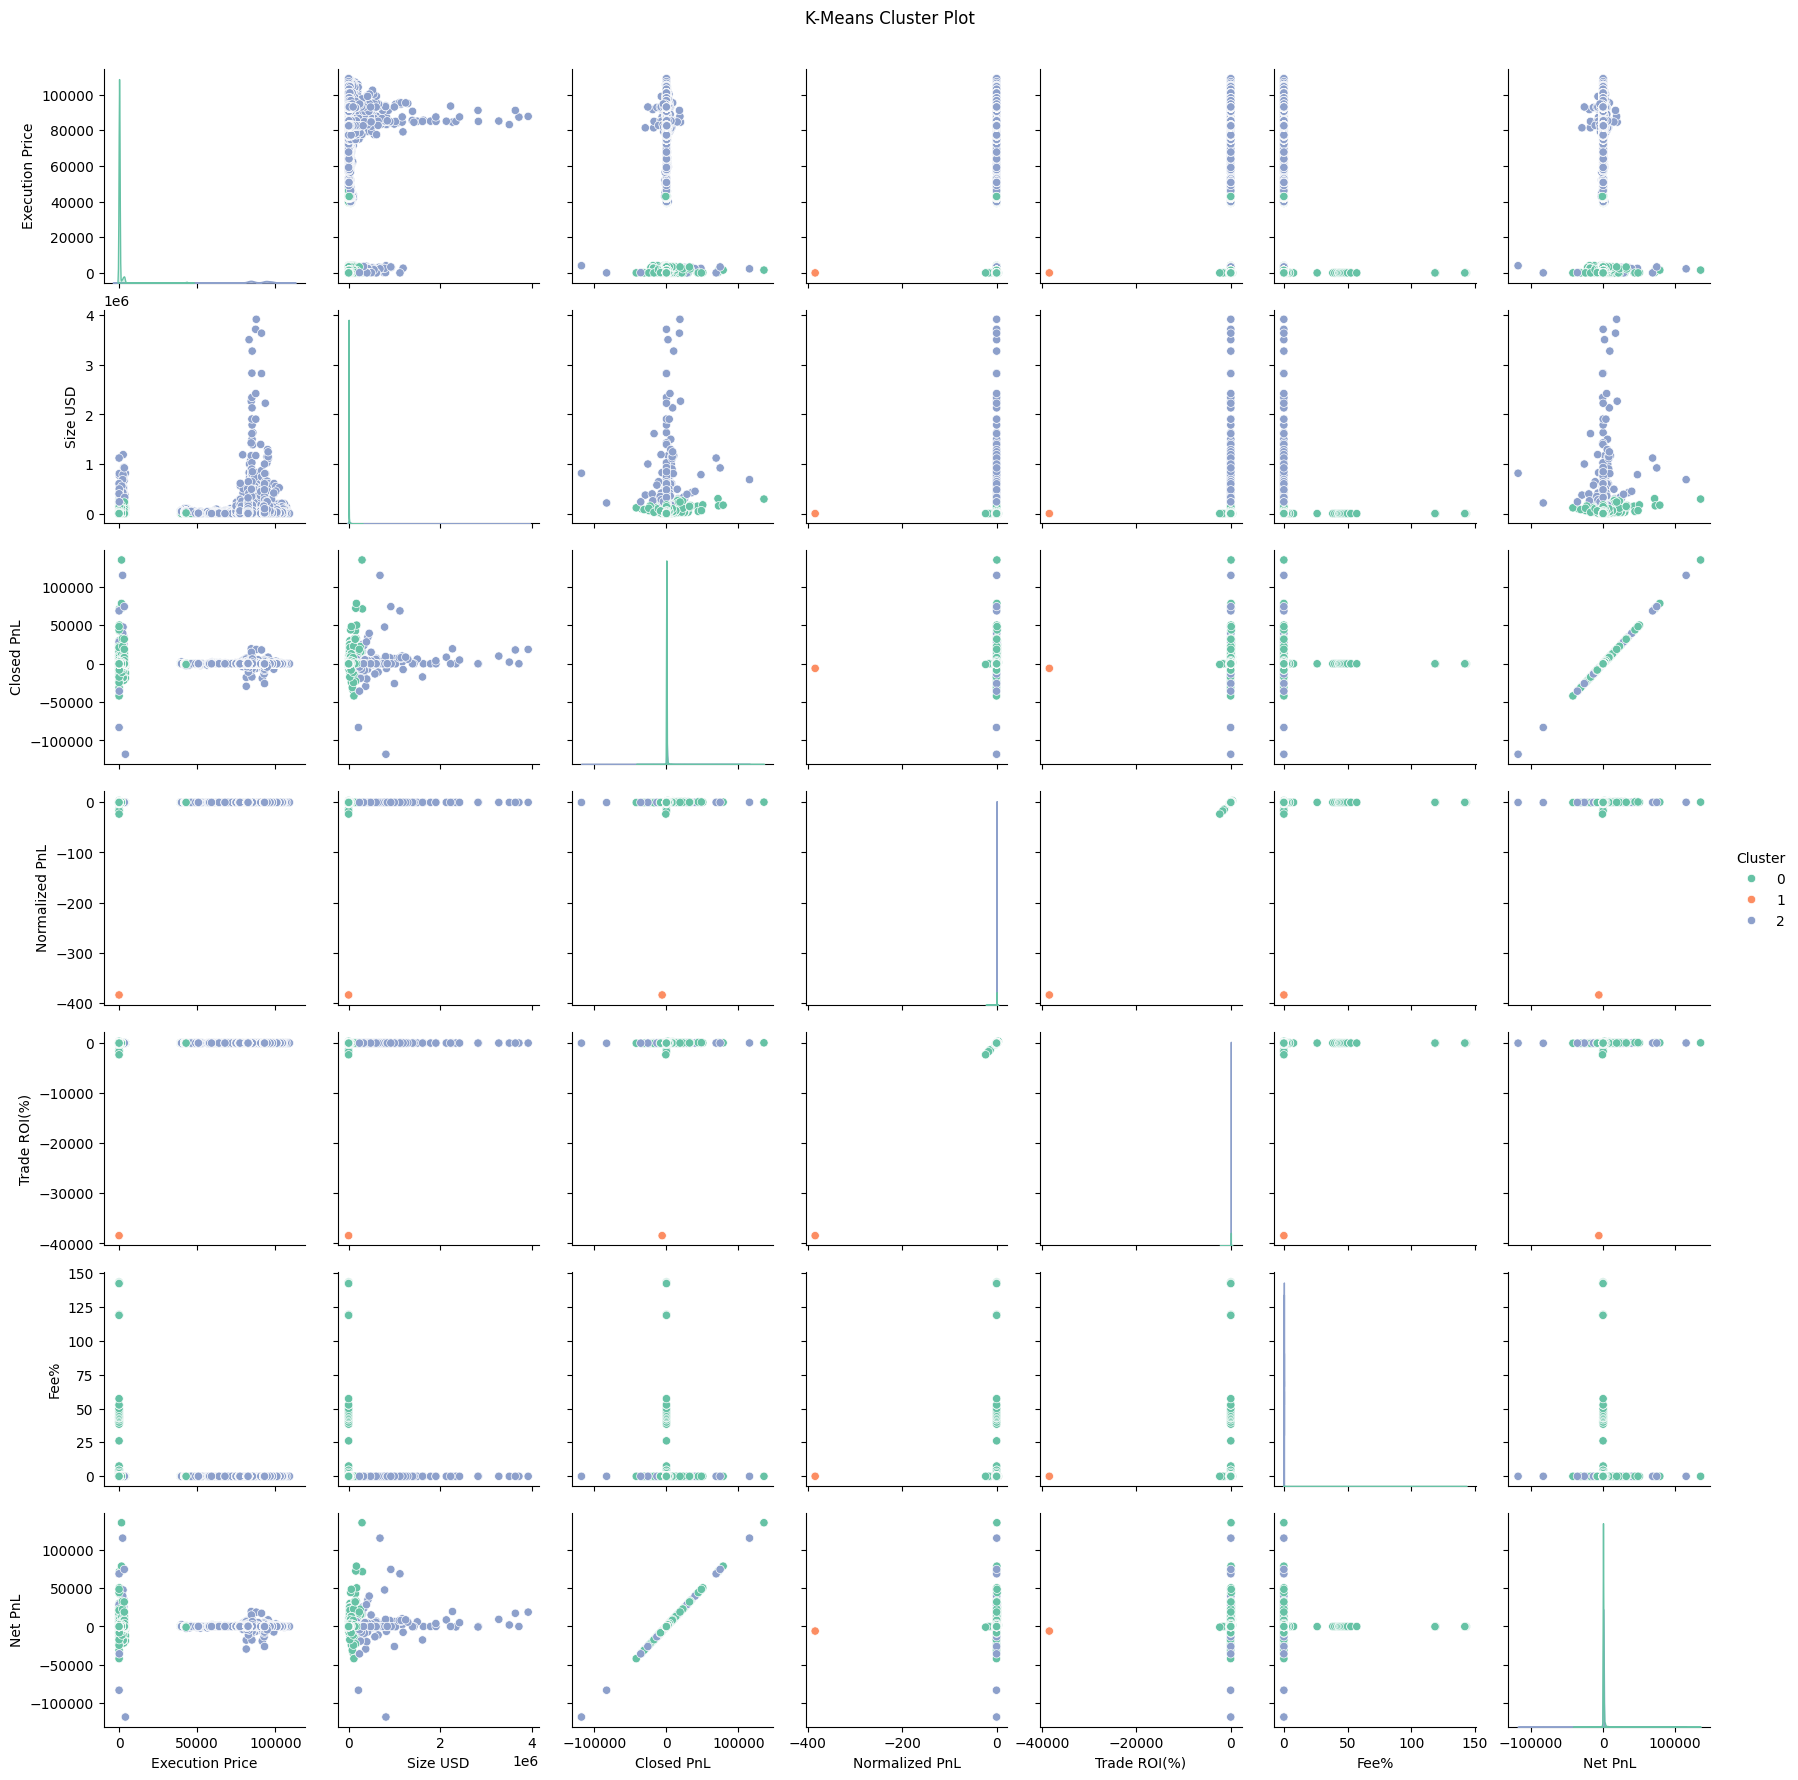

In [67]:
#Visualize results using seaborn pairplot
plot_df = clustering_data.copy()
plot_df['Cluster'] = clusters
sns.pairplot(plot_df, hue='Cluster', palette='Set2')
plt.suptitle('K-Means Cluster Plot', y=1.02)
plt.show()

In [68]:
#View cluster centers in original scale
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
)

In [69]:
print("\nCluster Centers (Original Scale):")
print(cluster_centers)


Cluster Centers (Original Scale):
   Execution Price      Size USD   Closed PnL  Normalized PnL  Trade ROI(%)  \
0       520.516720   2796.976815    49.366629        0.023515      2.351535   
1         0.002594     15.560000 -5981.363990     -384.406426 -38440.642609   
2     88683.572022  25801.841613    43.064947        0.001558      0.155757   

       Fee%      Net PnL  
0  0.036887    48.813942  
1  0.033586 -5981.369216  
2  0.020707    37.564705  
